In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
data=pd.read_csv('newhousing.csv')

In [49]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,5250000,5500,3,2,1,1,0,1,0,0,0,0,1,0,1833.333333,0.666667
1,4480000,4040,3,1,2,1,0,0,0,0,1,0,1,0,1346.666667,0.333333
2,3570000,3640,2,1,1,1,0,0,0,0,0,0,0,1,1820.000000,0.500000
3,2870000,3040,2,1,1,0,0,0,0,0,0,0,0,1,1520.000000,0.500000
4,3570000,4500,2,1,1,0,0,0,0,0,0,0,0,0,2250.000000,0.500000


In [50]:
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606,1819.852599,0.446361
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402,839.091825,0.159492
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,381.000000,0.166667
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1237.500000,0.333333
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1666.666667,0.400000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2183.333333,0.500000
90%,7.350000e+06,7980.000000,4.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2852.000000,0.666667
95%,8.400000e+06,9000.000000,4.000000,2.000000,4.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,3364.000000,0.666667
99%,1.054200e+07,12543.600000,5.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,4883.720000,1.000000


In [51]:
corrmat = np.corrcoef(data.drop('price',axis=1).transpose())
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)

max corr: 0.8056104195904634 , min corr:  -0.5884049771343838


In [52]:
# # Retrieve the (i,j) index for which matrix has maximum value
# ij_max = np.unravel_index(cor.argmax(), cor.shape)
# print("ij_max",ij_max)
# print("Maximum correlation :",cor[ij_max])

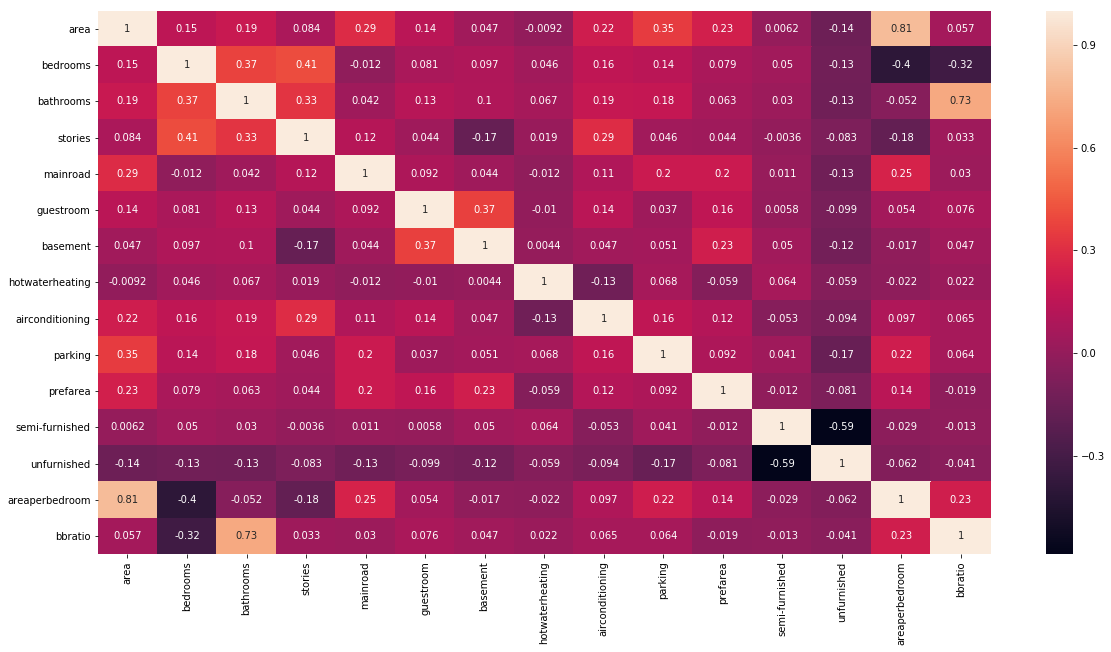

In [53]:
%matplotlib inline
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.drop('price',axis=1).corr(),annot = True)

In [54]:
from sklearn.model_selection import train_test_split
X=data.drop('price',axis=1)
y=data['price']
X_train,X_test,y_train,y_test=train_test_split(X, y, train_size=0.7 ,test_size = 0.3, random_state=100)

In [55]:
X_train_cols=X_train.columns
print(X_train_cols)
print(type(X_train))

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea',
       'semi-furnished', 'unfurnished', 'areaperbedroom', 'bbratio'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


In [56]:
from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
X_train_std=X_scaler.transform(X_train)
pd.DataFrame(X_train_std)[0].max()

4.98610656210858

In [57]:
X_scaler = StandardScaler().fit(X_test)
X_test_std=X_scaler.transform(X_test)

In [58]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [59]:
lr.fit(X_train_std,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
y_pre=lr.predict(X_test_std)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score

In [62]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pre))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pre))

Mean squared error: 1243532954592.23
R2 score: 0.64


In [63]:
from sklearn.decomposition import PCA
pca = PCA(random_state=100)

In [64]:
#Doing the PCA on the train data
pca_base=pca.fit(X_train_std)

In [65]:
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df.head()

,Feature,PC1,PC2
0,area,0.466911,0.253614
1,bedrooms,0.131123,-0.501994
2,bathrooms,0.320620,-0.322073
3,stories,0.181371,-0.391036
4,mainroad,0.298975,0.132957


In [66]:
pca.explained_variance_ratio_

array([0.17657495, 0.13563483, 0.1110914 , 0.09817563, 0.0921252 ,
       0.07037984, 0.06221571, 0.05705166, 0.05241884, 0.04695577,
       0.03907182, 0.03003894, 0.02467858, 0.0023867 , 0.00120014])

In [67]:
pca_again = PCA(0.80)

In [68]:
df_train_pca2 = pca_again.fit_transform(X_train_std)
df_train_pca2.shape

(381, 8)

In [69]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 17.66,  31.22,  42.33,  52.15,  61.36,  68.4 ,  74.62,  80.33,
        85.57,  90.27,  94.18,  97.18,  99.65,  99.89, 100.01])

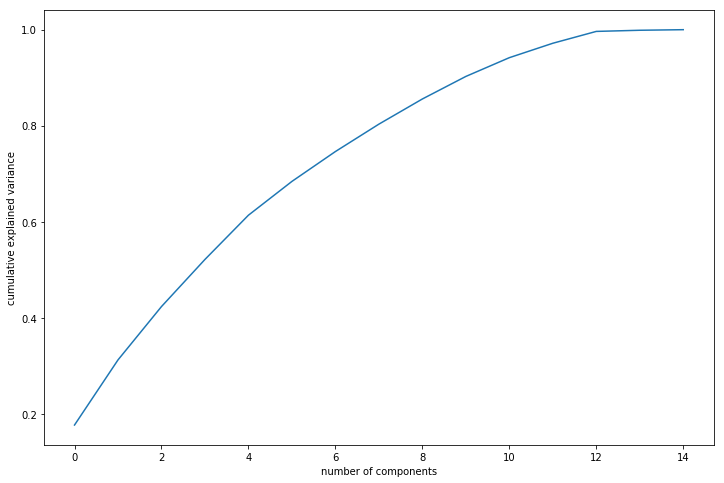

In [70]:
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [71]:
np.dot(pca.components_[0],pca.components_[1]).round(5)

0.0

In [72]:
corrmat = np.corrcoef(df_train_pca2.transpose())

In [73]:
corrmat

array([[ 1.00000000e+00, -1.25528934e-16,  1.35375178e-16,
         1.18036844e-17,  1.74913755e-16,  1.77748316e-17,
         2.89137226e-17,  6.34847107e-17],
       [-1.25528934e-16,  1.00000000e+00, -6.77348127e-17,
         4.17501679e-17,  2.06068832e-16, -1.86105889e-16,
         1.98786190e-16,  3.18007042e-17],
       [ 1.35375178e-16, -6.77348127e-17,  1.00000000e+00,
        -1.55509958e-16,  4.78611788e-16,  1.16221191e-16,
         6.95169497e-17,  2.53777413e-17],
       [ 1.18036844e-17,  4.17501679e-17, -1.55509958e-16,
         1.00000000e+00,  3.78095950e-16, -9.76886957e-17,
        -1.56348156e-16,  2.07657678e-17],
       [ 1.74913755e-16,  2.06068832e-16,  4.78611788e-16,
         3.78095950e-16,  1.00000000e+00, -3.81682416e-16,
         3.26208337e-16,  1.05287508e-16],
       [ 1.77748316e-17, -1.86105889e-16,  1.16221191e-16,
        -9.76886957e-17, -3.81682416e-16,  1.00000000e+00,
         1.04659673e-16,  2.14602002e-17],
       [ 2.89137226e-17,  1.987861

In [74]:
lr2 = LinearRegression()
model_pca2 = lr.fit(df_train_pca2,y_train)

In [75]:
df_test_pca2 = pca_again.transform(X_test_std)

In [76]:
y_pred2=model_pca2.predict(df_test_pca2)

In [77]:
print(mean_squared_error(y_test,y_pred2))
r2_score(y_test, y_pred2)

1210062385697.7466


0.6497243379932052

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import  linear_model
from sklearn.metrics import mean_squared_error, r2_score
# Create linear regression object
regrpca = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca.fit(pca_train, ytrain)
# Make predictions using the principal components of the transformed testing set
y_pca_pred = regrpca.predict(pca_test)
print("Mean squared error: %.2f" % mean_squared_error(ytest, y_pca_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(ytest, y_pca_pred))

NameError: name 'pca_train' is not defined

In [ ]:
pca3 = PCA(n_components=6,random_state=100)

In [ ]:
df_train_pca=pca3.fit_transform(X_train_std)

In [ ]:
df_test_pca=pca3.fit_transform(X_test_std)

In [ ]:
lr3=LinearRegression()
lr3.fit(df_train_pca,y_train)
lr3_y_pred=lr3.predict(df_test_pca)

In [ ]:
print("Mean squared error: %.2f" % mean_squared_error(y_test, lr3_y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, lr3_y_pred))
r2_score(y_test, lr3_y_pred)

In [82]:
pca = PCA(n_components=6,random_state=100)
#Scale and transform data to get Principal Components

Xtrain_reduced = pca.fit_transform(X_train)
Xtest_reduced = pca.transform(X_test)
regrpca6 = linear_model.LinearRegression()
# Train the model using the principal components of the transformed training sets
regrpca6.fit(Xtrain_reduced, y_train)
# Make predictions using the principal components of the transformed testing set
y_pred = regrpca6.predict(Xtest_reduced)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 1219865792057.17
R2 score: 0.65
